In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
class ArtificialMarket():
    def __init__(self, num_player=1000, sigma=0.06, P_sigma=30):
        self.num_player = num_player
        self.random_state = np.random.RandomState()
        self.weight = self.weight()
        self.sigma = sigma
        self.P_sigma = P_sigma
    
    def weight(self, w_1_max=1, w_2_max=10, w_3_max=1):
        num_player = self.num_player
        weight_1 = np.zeros(num_player)
        weight_2 = np.zeros(num_player)
        weight_3 = np.zeros(num_player)
        random_state = self.random_state
        for i in range(num_player):
            weight_1[i] = random_state.uniform()*w_1_max
            weight_2[i] = random_state.uniform()*w_2_max
            weight_3[i] = random_state.uniform()*w_3_max
        weight = [weight_1, weight_2, weight_3]
        return weight
    
    def ganma(self, ganma_max=10000, num_player=None):
        random_state = self.random_state
        if num_player is None:
            num_player = self.num_player
        ganma = np.array([])
        for i in range(num_player):
            ganma = np.append(ganma, int(random_state.uniform(ganma_max)))
        return ganma
    
    def one_market_model(self, delta_l, w, ganma, fdmtl=10000.0, t=0, delta_t=None, past_data=None, b_limit=None, s_limit=None, delta=1):
        num_player = self.num_player
        sigma = self.sigma
        P_sigma = self.P_sigma
        P_f = fdmtl
        
        if past_data is None:
            past_data = np.array([P_f])
        if b_limit is None:
            b_limit = np.array([])
        if s_limit is None:
            s_limit = np.array([])
        
        w_1 = w[0]
        w_2 = w[1]
        w_3 = w[2]
        r_t_e = np.zeros(num_player)
        
        if delta_t is None:
            delta_t = np.array([])
            
        for i in range(num_player):         
            if t < 10:
                P_t_1 = past_data[-1]
            else: 
                d = 0
                j = 0
                while d <= delta_l:
                    d += delta_t[-j]
                    j += 1
                P_t_1 = past_data[-j]
                
            if len(past_data) < ganma[i]:
                r_t_h = np.log10(P_t_1/past_data[0])
            else:
                past_data_ganma = past_data[-ganma[i]]
                r_t_h = np.log10(P_t_1/past_data_ganma)
                
            e_t = np.random.normal(0, sigma)
            r_t_e[i] = (w_1[i]*np.log10(P_f/P_t_1) + w_2[i]*r_t_h + w_3[i]*e_t)/(w_1[i] + w_2[i] + w_3[i])
            P_e = P_t_1*math.exp(r_t_e[i])
            P_o = np.random.normal(P_e, P_sigma)
            print w_1[i]*np.log10(P_f/P_t_1), w_2[i]*r_t_h, r_t_e[i]
            if P_e > P_o:
                P_o = round(P_o, 1)
                if len(s_limit) > 0 and np.min(s_limit) < P_o:
                    P_t = np.min(s_limit)
                    s_limit = np.delete(s_limit, np.argmin(s_limit))
                else:
                    b_limit = np.append(b_limit, P_o)
                    P_t = P_t_1
            else:
                P_o = round(P_o, 1)+0.1
                if len(b_limit) > 0 and np.max(b_limit) > P_o:
                    P_t = np.max(b_limit)
                    b_limit = np.delete(b_limit, np.argmax(b_limit))
                else:
                    s_limit = np.append(s_limit, P_o)
                    P_t = P_t_1
            past_data = np.append(past_data, P_t)
            delta_t = np.append(delta_t, np.random.exponential(delta))
            t += delta_t[-1]
        return t, delta_t, past_data, b_limit, s_limit
        
    def one_market_simulation(self, delta_l, o_max=10000, fdmtl=10000):
        o = 0
        w = self.weight 
        ganma = self.ganma()
        t, delta_t, past_data, b_limit, s_limit = self.one_market_model(delta_l, w, ganma, fdmtl)
        while o < o_max:
            t, delta_t, past_data, b_limit, s_limit = self.one_market_model(delta_l, w, ganma, fdmtl, t, delta_t, past_data, b_limit, s_limit)
            o += 1
        return past_data, t
    
    def rad(self, past_data, fdmtl=10000):
        p = 0
        for i in range(len(past_data)):
            p += math.fabs(float(past_data[i]) - fdmtl)/fdmtl
        m = 1.0/float(len(past_data))*p
        return m

In [16]:
AM = ArtificialMarket()

0.0 0.0 -0.00550044370744
0.0 0.0 0.00198826467684
0.0 0.0 -0.0242065926799
-0.000115757846759 0.00150979428399 -0.00270565443163
-0.000166109894181 4.36631071016e-05 -0.0407628342828
0.00137457118866 -0.00644479448683 0.000293732890896
0.00026403529542 -0.00462151748128 0.000650979901987
9.72181941463e-05 -0.0127361850674 -0.00111956370653
3.75859753447e-05 -1.55685506157e-05 -0.0713961620528
0.00242804971382 -0.00364303003118 0.000436338234875
0.00111658657956 -0.0217088312174 -0.000591269482432
0.000318872449094 -0.0171676579739 -0.0101885073121
0.001410657915 -0.0108049040224 -0.00719346534563
0.00206982824917 -0.0288360448161 -0.0171337317754
7.7920269398e-05 -0.029742072949 0.00315774654097
0.00358306219874 -0.0142116562758 -0.00219563794283
0.00340256362095 -0.000810919450412 -0.0176701437763
0.00267909112317 -0.0227670436977 -0.0019085921038
0.00264916195579 -0.027976167863 -0.00724597184793
0.00108523485155 -0.00630351127368 -0.00627220778288
0.00189833057105 -0.0117386098634 

0.32408146926536696

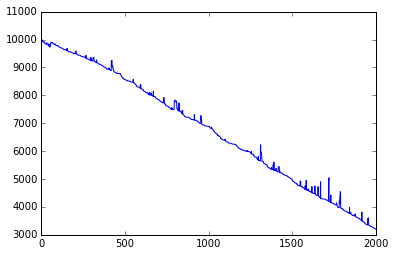

In [17]:
AM = ArtificialMarket()
k, t= AM.one_market_simulation(0, 1)
plt.plot(k)
AM.rad(k)